#  Istogrammi e sogliature

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import draw as drw
from skimage import  exposure, img_as_float, img_as_ubyte 
from skimage import data, io, color
%matplotlib inline

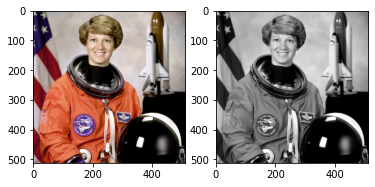

In [63]:
astro = data.astronaut() 
g_astro = img_as_ubyte(color.rgb2gray(astro))

plt.subplot(1,2,1)
plt.imshow(astro)

plt.subplot(1,2,2)
plt.imshow(g_astro,cmap='gray');

### Istogrammi

Una rappresentazione alternativa dell'immagine che mette in evidenza la distribuzione delle intensità perdendo informazione spaziale. <br> 

A partire dalla stessa immagine si possono costruire istogrammi diversi, cambiando il numero di bin (elementi dell'istogramma) o scegliendo di normalizzare l'istogramma (in questo modo lo possiamo trattare come una stima di probabilità).  

**For more info**: check the documentation of  `plt.hist` (from `matplotlib`)

In [22]:
plt.hist??

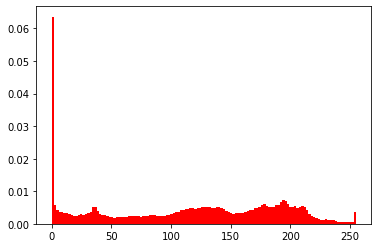

In [45]:
#density controls normalization (try out density False)
#bins the number of bins
plt.hist(g_astro.ravel(), bins=128, density=True, color='r');


Diamo un'occhiata agli istogrammi dei campi di colore

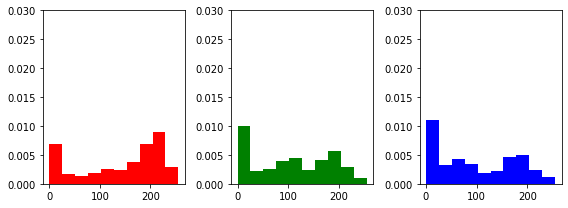

In [31]:
R = astro[:,:,0]
G = astro[:,:,1]
B = astro[:,:,2]

plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.hist(R.ravel(), density=True, color='r'); #density controls normalization (try out density False)
plt.ylim([0,0.03])


plt.subplot(1,3,2)
plt.hist(G.ravel(), density=True, color='g');
plt.ylim([0,0.03])

plt.subplot(1,3,3)
plt.ylim([0,0.03])
plt.hist(B.ravel(), density=True, color='b');

plt.tight_layout() # a handy command that increases spacing between subplots

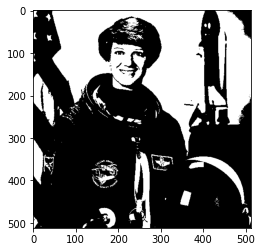

In [53]:
mask = np.multiply((R > 140),(G>150))
plt.imshow(mask, cmap='gray');

Quali sono le relazioni tra campi diversi? come osservarle?

Text(0.5, 0, 'G')

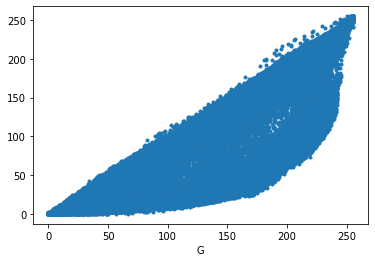

In [93]:
# ogni punto rappresenta la coppia (R,G) dei pixel dell'immagine
plt.plot(R.ravel(),G.ravel(),'.')
plt.xlabel('R')
plt.xlabel('G')


La funzione qui di seguito (per immagini a intensità luminosa) ci permette di visualizzare immagine, istogramma, cumulativa  

In [94]:
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    #img = img_as_float(img) ##Convert our input greyscale image to float 
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 255)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])
   
    return ax_img, ax_hist, ax_cdf



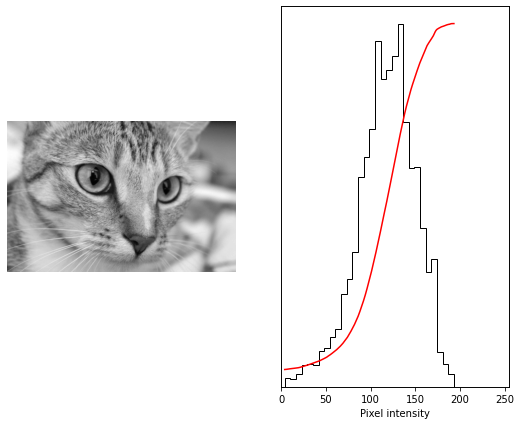

In [95]:
# Test the function plot_img_and_hist using a sample image
img = data.chelsea()
img = img_as_ubyte(color.rgb2gray(img))

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes,30) 


### Contrast stretching  


In [57]:
def my_contrast_stretch(img):
    M=np.max(img)
    m=np.min(img)
    return np.multiply(np.divide((img-m),(M-m)),255).astype(np.uint8)

Confronto con la funzione skimage (più generica)

/Users/odone/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


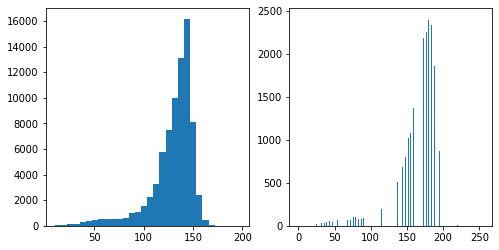

In [99]:
# Load an example image
rgb_img = data.text() 

#rgb_img = data.logo() 
img = img_as_ubyte(color.rgb2gray(rgb_img))

my_img_rescale = my_contrast_stretch(img);


fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.hist((img).ravel(), bins=30); # color='black' , histtype='step' );
plt.subplot(1,2,2)
plt.hist((my_img_rescale).ravel(), bins=1000); # color='black' , histtype='step' );

Nella versione di `skimage` possiamo controllare il range di input che vogliamo espandere. Qui usiamo i percentili

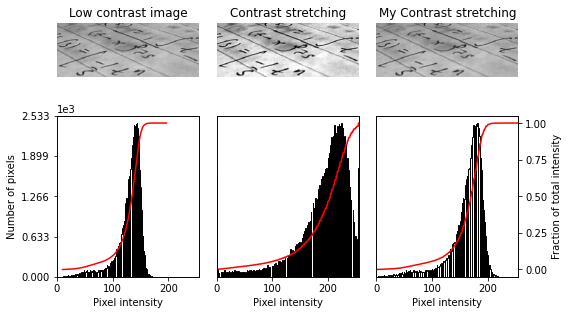

In [82]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
my_img_rescale = my_contrast_stretch(img);

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 3, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 3, 4+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(my_img_rescale, axes[:, 2])
ax_img.set_title('My Contrast stretching')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()